In [1]:
import torch
from torch import (optim, nn)

from torch.utils.data import (
    DataLoader,
    TensorDataset,
    random_split
)

import numpy as np

# User-defined classes
from utils.base import (
    LogisticRegression,
    Trainer
)

# User-defined functions
from utils.preprocess import clusters

# Plotting
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
plt.rcParams["font.family"] = "monospace"

In [2]:
# Constants
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DTYPE = torch.float32
BATCH_SIZE = 32
NUM_EPOCHS = 20
SIZE = 100
GENERATOR = torch.Generator().manual_seed(42)

print(f"Device has ben set to: {torch.cuda.get_device_properties(DEVICE).name}")

Device has ben set to: NVIDIA GeForce RTX 4060 Laptop GPU


In [3]:
X, y = clusters(SIZE, std0 = 1.3, std1 = 1.6)

In [4]:
print("Generated X:", X, "\nGenerated y:", y, sep='\n')
print("\nShape of X: ", X.shape, "\nShape of y: ", y.shape, sep='\n')

Generated X:
tensor([[-3.6154e+00, -1.8802e+00],
        [-4.7853e+00, -3.9281e+00],
        [-5.3581e+00, -3.1594e+00],
        [-2.3890e+00, -1.6472e+00],
        [-1.8271e+00, -2.2494e+00],
        [-1.7291e+00, -1.7730e+00],
        [-4.5261e+00, -3.7007e+00],
        [ 1.3778e-01, -1.2673e+00],
        [-2.7843e+00, -2.8005e+00],
        [-2.3895e+00, -2.3644e+00],
        [-3.1594e+00, -4.9123e-01],
        [-2.4386e+00, -3.5007e+00],
        [-1.3243e+00, -2.0064e+00],
        [-2.7458e+00, -1.9822e+00],
        [-4.7314e+00, -3.9193e+00],
        [-2.1391e+00,  2.4107e-01],
        [-1.7027e+00, -1.7675e+00],
        [-2.8446e+00, -4.1635e+00],
        [-1.8684e+00, -2.0898e+00],
        [-4.1140e+00, -2.5248e+00],
        [-1.7418e+00, -2.5923e+00],
        [-5.3716e+00, -3.8550e+00],
        [-9.9019e-01, -2.7123e+00],
        [-2.9206e+00, -1.0935e+00],
        [-5.4577e+00, -3.3522e+00],
        [-2.2709e+00, -4.6636e+00],
        [-1.1112e+00, -1.1954e+00],
        [-1.247

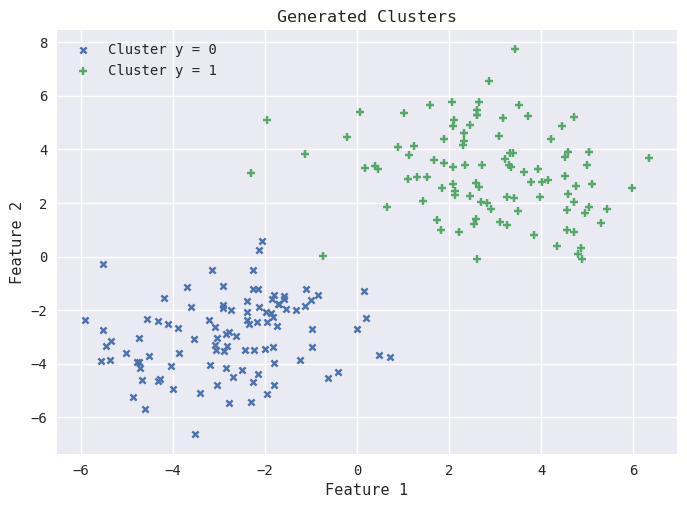

In [5]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x', label='Cluster y = 0', s=20)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', label='Cluster y = 1', s=40)
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Clusters')
plt.show()

In [6]:
Model = LogisticRegression(in_dims=2).to(DEVICE)

In [7]:
Data = TensorDataset(X, y)
Data.tensors

(tensor([[-3.6154e+00, -1.8802e+00],
         [-4.7853e+00, -3.9281e+00],
         [-5.3581e+00, -3.1594e+00],
         [-2.3890e+00, -1.6472e+00],
         [-1.8271e+00, -2.2494e+00],
         [-1.7291e+00, -1.7730e+00],
         [-4.5261e+00, -3.7007e+00],
         [ 1.3778e-01, -1.2673e+00],
         [-2.7843e+00, -2.8005e+00],
         [-2.3895e+00, -2.3644e+00],
         [-3.1594e+00, -4.9123e-01],
         [-2.4386e+00, -3.5007e+00],
         [-1.3243e+00, -2.0064e+00],
         [-2.7458e+00, -1.9822e+00],
         [-4.7314e+00, -3.9193e+00],
         [-2.1391e+00,  2.4107e-01],
         [-1.7027e+00, -1.7675e+00],
         [-2.8446e+00, -4.1635e+00],
         [-1.8684e+00, -2.0898e+00],
         [-4.1140e+00, -2.5248e+00],
         [-1.7418e+00, -2.5923e+00],
         [-5.3716e+00, -3.8550e+00],
         [-9.9019e-01, -2.7123e+00],
         [-2.9206e+00, -1.0935e+00],
         [-5.4577e+00, -3.3522e+00],
         [-2.2709e+00, -4.6636e+00],
         [-1.1112e+00, -1.1954e+00],
 

In [8]:
trainData, valData = random_split(Data, (0.8, 0.2), generator=GENERATOR)

trainLoader = DataLoader(trainData, batch_size=BATCH_SIZE, generator=GENERATOR, shuffle=True)
valLoader = DataLoader(valData, batch_size=BATCH_SIZE, generator=GENERATOR, shuffle=True)

In [9]:
trainer = Trainer(
    Model,
    trainLoader,
    valLoader,
    optimizer=optim.SGD(Model.parameters(), lr=.1),
    criterion=nn.BCELoss(reduction='mean'),        # Binary Cross-entropy Loss (For classification)
    device=DEVICE
)

In [10]:
train_loss, val_loss = trainer.train(num_epochs=NUM_EPOCHS)

	Epoch 1 | Weights: tensor([0.1101, 0.6528], device='cuda:0')
	Epoch 1 | Bias: tensor([-0.7920], device='cuda:0')
	Epoch 1 | Weights: tensor([0.1543, 0.6784], device='cuda:0')
	Epoch 1 | Bias: tensor([-0.7882], device='cuda:0')
	Epoch 1 | Weights: tensor([0.1964, 0.7020], device='cuda:0')
	Epoch 1 | Bias: tensor([-0.7773], device='cuda:0')
	Epoch 1 | Weights: tensor([0.2173, 0.7223], device='cuda:0')
	Epoch 1 | Bias: tensor([-0.7744], device='cuda:0')
	Epoch 1 | Weights: tensor([0.2362, 0.7374], device='cuda:0')
	Epoch 1 | Bias: tensor([-0.7716], device='cuda:0')
Epoch 1/20 | Loss: 0.1591
	| Validation Loss: 0.1060

	Epoch 2 | Weights: tensor([0.2676, 0.7549], device='cuda:0')
	Epoch 2 | Bias: tensor([-0.7630], device='cuda:0')
	Epoch 2 | Weights: tensor([0.2936, 0.7683], device='cuda:0')
	Epoch 2 | Bias: tensor([-0.7619], device='cuda:0')
	Epoch 2 | Weights: tensor([0.3079, 0.7794], device='cuda:0')
	Epoch 2 | Bias: tensor([-0.7603], device='cuda:0')
	Epoch 2 | Weights: tensor([0.3211

In [11]:
print("Train Loss:", train_loss, "\nValidation Loss:", val_loss, sep='\n')

Train Loss:
{0: 0.15911047160625458, 1: 0.09656907469034196, 2: 0.07298031374812126, 3: 0.060263073444366454, 4: 0.052260659635066986, 5: 0.04679835364222527, 6: 0.04278318658471107, 7: 0.039683453366160394, 8: 0.03720691204071045, 9: 0.035199877247214316, 10: 0.03351223450154066, 11: 0.032079238817095755, 12: 0.030862043239176275, 13: 0.029808965511620045, 14: 0.0288644852116704, 15: 0.028019517287611963, 16: 0.027275116182863712, 17: 0.026602263748645782, 18: 0.026004076562821866, 19: 0.025439487770199776}

Validation Loss:
{0: 0.10598157718777657, 1: 0.06518483906984329, 2: 0.05252649635076523, 3: 0.03945714607834816, 4: 0.045345840975642204, 5: 0.03613092191517353, 6: 0.019835326354950666, 7: 0.025489378720521927, 8: 0.022753671742975712, 9: 0.020254037342965603, 10: 0.01648154202848673, 11: 0.01915893331170082, 12: 0.013066864339634776, 13: 0.0168936001136899, 14: 0.013027917593717575, 15: 0.014448078814893961, 16: 0.01344672404229641, 17: 0.012759391218423843, 18: 0.0120839541777

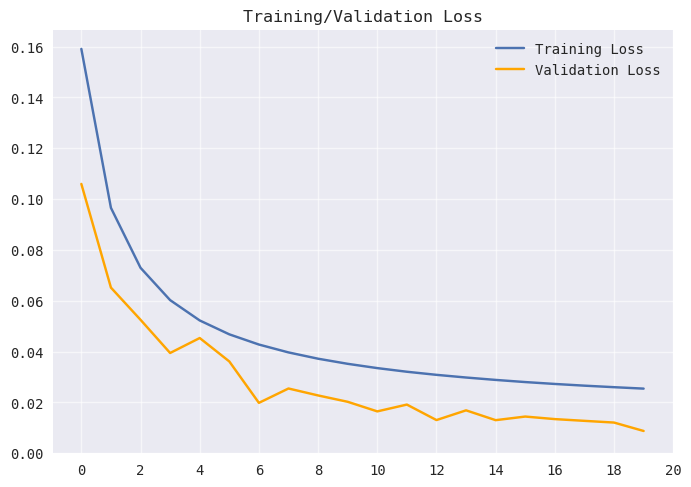

In [12]:
plt.plot(
    train_loss.keys(),
    train_loss.values(),
    label="Training Loss"
);
plt.plot(
    val_loss.keys(),
    val_loss.values(),
    color="orange",
    label="Validation Loss"
);
plt.ylim(bottom=-0);
plt.xticks(np.linspace(0, 20, 11));
plt.grid(True, alpha = .6);
plt.title("Training/Validation Loss");
plt.legend(loc='best');
plt.show()

In [13]:
print(f"Predicted Model Parameters:", "Weights: {}".format(Model.w), "Bias: {}".format(Model.b), sep="\n")

Predicted Model Parameters:
Weights: Parameter containing:
tensor([0.7983, 1.1919], device='cuda:0', requires_grad=True)
Bias: Parameter containing:
tensor([-0.6266], device='cuda:0', requires_grad=True)


In [14]:
T = torch.linspace(X.min(), X.max(), SIZE, dtype=DTYPE, device=DEVICE).reshape(SIZE, 1)

slope = -Model.w[0] / Model.w[1]
interc = -Model.b / Model.w[1]
boundary = slope * T + interc

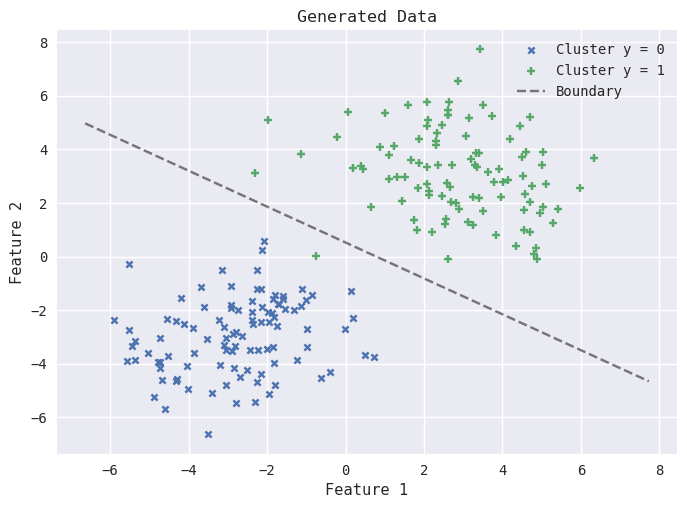

In [15]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x', label='Cluster y = 0', s=20)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', label='Cluster y = 1', s=40)
# Decision Boundary
plt.plot(
    T.detach().cpu(),
    boundary.detach().cpu(),
    alpha=.5,
    color='black',
    linestyle='--',
    label="Boundary"
);

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Generated Data");
plt.legend(loc='best');
plt.show();